# Student Name
### Amirhossein Amirzadehirani
# Student Number
### 3143092 

# Classification with SVM's

## Download the Iris dataset from sklearn

In [1]:
from sklearn.datasets import load_iris

df = load_iris(as_frame=True).frame

x = df.drop('target', axis=1)
y = df.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Prepare data for 2d experiments and plots

In [2]:
from sklearn.model_selection import train_test_split

## Split your data into a training and test set using train_test_split from sklearn and set stratify=y

In [3]:
x_train_2d, x_test_2d, y_train_2d, y_test_2d = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

x_train_2d.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
45,4.8,3.0,1.4,0.3
1,4.9,3.0,1.4,0.2
38,4.4,3.0,1.3,0.2
7,5.0,3.4,1.5,0.2
82,5.8,2.7,3.9,1.2


## You will be grabbing 2 features from the dataset (You can use any of the feature selection methods you learnt in class)
Hint: I used chi-square feature selection because it is easy, fast and gave the same results as recursive feature elimination in previous labs

In [4]:
from sklearn.feature_selection import SelectKBest, chi2

k_in = 2
feature_selector = SelectKBest(chi2, k=k_in).fit(x_train_2d, y_train_2d)

x_tr_fs = feature_selector.transform(x_train_2d)
x_ts_fs = feature_selector.transform(x_test_2d)

### Show which features were selected

In [5]:
x.iloc[:,feature_selector.get_support(indices=True)].columns

Index(['petal length (cm)', 'petal width (cm)'], dtype='object')

## Use StandardScaler to feature scale your data (If you are using chi-squared, you will want to do this after you have selected your features)

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_tr_fs)
x_tr_scl = scaler.transform(x_tr_fs)
x_ts_scl = scaler.transform(x_ts_fs)

# We are going to use these pairs of data:
# (x_tr_scl , y_train_2d) 
# (x_ts_scl , y_test_2d ) 

# Prepare data for 3d experiments and plots

## Grab the first 3 features in your datsset and change to binary classification problem 
- You will have to make the problem a binary classifiation problem
  - This will be done by grabbing Only labels with 0 or 1. We will be completely ignoring class 2

In [7]:
import numpy as np 

x_3d = x.drop('petal width (cm)', axis=1)
x_3d.drop(df[df.target==2].index, axis=0, inplace=True)
y_3d = y.drop(df[df.target==2].index, axis=0)

y_3d.value_counts()

0    50
1    50
Name: target, dtype: int64

## Split the data into a training and testing dataset using train_test_split from sklearn and set stratify=y (In this case remember y is your binary version of y which has only 2 labels 0 and 1)

In [8]:
x_train_3d, x_test_3d, y_train_3d, y_test_3d = train_test_split(x_3d,y_3d, test_size=0.2, random_state=0, stratify=y_3d)
x_train_3d.head()

# We are going to use these pairs of data:
# (x_train_3d , y_train_3d) 
# ( x_test_3d , y_test_3d ) 

,sepal length (cm),sepal width (cm),petal length (cm)
60,5.0,2.0,3.5
13,4.3,3.0,1.1
7,5.0,3.4,1.5
82,5.8,2.7,3.9
20,5.4,3.4,1.7


## Train, predict and plot svm on 2d prepared data with the following configuration:

- kernel="linear", C=1.0

In [9]:
from sklearn.svm import SVC

model = SVC(kernel='linear', C=1.0)

In [10]:
clf = model.fit(x_tr_scl, y_train_2d)

### Calculate the accuracy and hinge loss on the training set

In [11]:
from sklearn.metrics import accuracy_score, hinge_loss

y_hing = clf.decision_function(x_tr_scl)
y_pred = model.predict(x_tr_scl)
acc = accuracy_score(y_train_2d, y_pred)
hingeloss = hinge_loss(y_train_2d, y_hing)

print(f"Accuracy scor is: {acc}, and Hinge Loss is: {hingeloss}")

Accuracy scor is: 0.9583333333333334, and Hinge Loss is: 0.10221068873096313


### Calculate the accuracy and hinge loss on the testing set

In [12]:
y_hing = clf.decision_function(x_ts_scl)
y_pred = model.predict(x_ts_scl)
acc = accuracy_score(y_test_2d, y_pred)
hingeloss = hinge_loss(y_test_2d, y_hing)

print(f"Accuracy scor is: {acc}, and Hinge Loss is: {hingeloss}")

Accuracy scor is: 0.9666666666666667, and Hinge Loss is: 0.08671923807330927


### Plot the decision boundary with each point colored with its groundtruth class in 2D
- encircle your support vectors

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out 


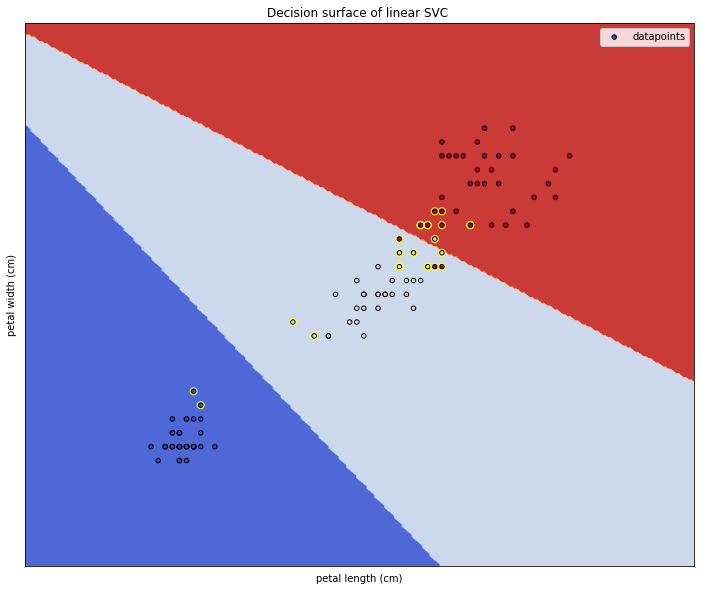

In [14]:
fig, ax = plt.subplots(figsize=(12,10))
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = x_tr_scl[:, 0], x_tr_scl[:, 1]
xx, yy = make_meshgrid(X0, X1)



plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=1)
ax.scatter(X0, X1, c=y_train_2d, cmap=plt.cm.coolwarm, s=20, edgecolors='k', label='datapoints')

# Encircle support vectors
plt.scatter(model.support_vectors_[:, 0],
            model.support_vectors_[:, 1], 
            s=50, 
            facecolors='none', 
            edgecolors='yellow', 
            alpha=1)
ax.set_ylabel(f'{df.iloc[:, 3].name}')
ax.set_xlabel(f'{df.iloc[:, 2].name}')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

## Train, predict and plot svm on 3d prepared data with the following configuration:

- kernel="linear", C=1.0

In [15]:
model = SVC(kernel='linear', C=1.0)
clf = model.fit(x_train_3d, y_train_3d)

### Plot 3D graph using binary training data with hyperplane separating the 2 points
    - Hint: You should have the plane perfectly seperating 2 classes

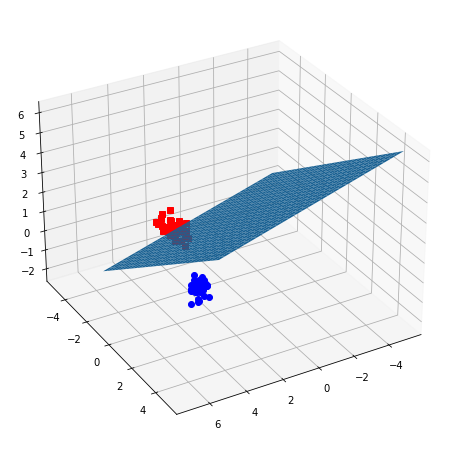

In [17]:
from mpl_toolkits.mplot3d import Axes3D

# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)
z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]

tmp = np.linspace(-5,5,30)
x,y = np.meshgrid(tmp,tmp)

fig = plt.figure(figsize=(12,8))
ax  = fig.add_subplot(111, projection='3d')
ax.plot3D(x_train_3d.loc[y_train_3d==0,'sepal length (cm)'], x_train_3d.loc[y_train_3d==0,'sepal width (cm)'], x_train_3d.loc[y_train_3d==0,'petal length (cm)'],'ob')
ax.plot3D(x_train_3d.loc[y_train_3d==1,'sepal length (cm)'], x_train_3d.loc[y_train_3d==1,'sepal width (cm)'], x_train_3d.loc[y_train_3d==1,'petal length (cm)'],'sr')
ax.plot_surface(x, y, z(x,y)) 
ax.view_init(30, 60)
plt.show()

### Get the accuracy and hinge loss of the testing set

In [18]:
y_hing = clf.decision_function(x_test_3d)
y_pred = model.predict(x_test_3d)
acc = accuracy_score(y_test_3d, y_pred)
hingeloss = hinge_loss(y_test_3d, y_hing)

print(f"Accuracy scor is: {acc}, and Hinge Loss is: {hingeloss}")

Accuracy scor is: 1.0, and Hinge Loss is: 0.0


## Train, predict and plot svm on 2d prepared data with the following configuration:

- kernel="linear", C=100000

In [19]:
model = SVC(kernel='linear', C=100000)
clf = model.fit(x_tr_scl, y_train_2d)

### Calculate the accuracy and hinge loss on the training set

In [20]:
y_hing = clf.decision_function(x_tr_scl)
y_pred = model.predict(x_tr_scl)
acc = accuracy_score(y_train_2d, y_pred)
hingeloss = hinge_loss(y_train_2d, y_hing)

print(f"Accuracy scor is: {acc}, and Hinge Loss is: {hingeloss}")

Accuracy scor is: 0.95, and Hinge Loss is: 0.12400458288797087


### Calculate the accuracy and hinge loss on the testing set

In [21]:
y_hing = clf.decision_function(x_ts_scl)
y_pred = model.predict(x_ts_scl)
acc = accuracy_score(y_test_2d, y_pred)
hingeloss = hinge_loss(y_test_2d, y_hing)

print(f"Accuracy scor is: {acc}, and Hinge Loss is: {hingeloss}")

Accuracy scor is: 0.9666666666666667, and Hinge Loss is: 0.09191635738490558


### Plot the decision boundary with each point colored with its groundtruth class in 2D
- encircle your support vectors

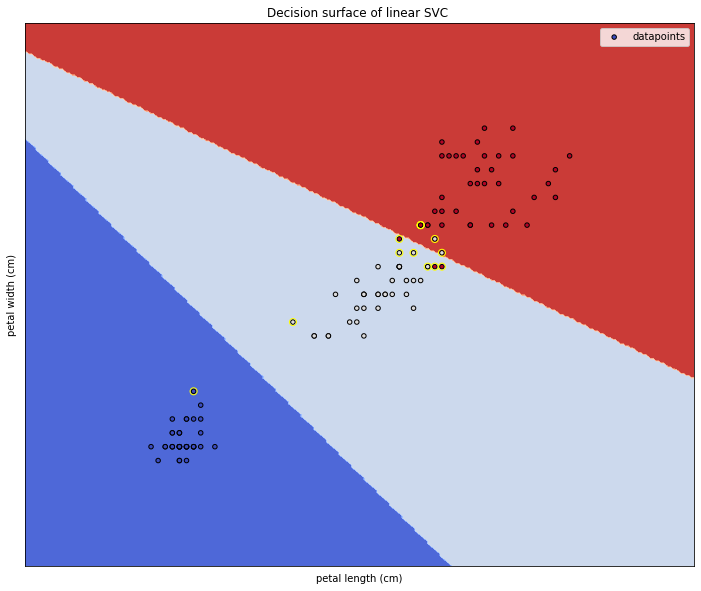

In [22]:
fig, ax = plt.subplots(figsize=(12,10))
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = x_tr_scl[:, 0], x_tr_scl[:, 1]
xx, yy = make_meshgrid(X0, X1)



plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=1)
ax.scatter(X0, X1, c=y_train_2d, cmap=plt.cm.coolwarm, s=20, edgecolors='k', label='datapoints')

# Encircle support vectors
plt.scatter(model.support_vectors_[:, 0],
            model.support_vectors_[:, 1], 
            s=50, 
            facecolors='none', 
            edgecolors='yellow', 
            alpha=1)
ax.set_ylabel(f'{df.iloc[:, 3].name}')
ax.set_xlabel(f'{df.iloc[:, 2].name}')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

## Train, predict and plot svm on 3d prepared data with the following configuration:

- kernel="linear", C=100000

In [26]:
model = SVC(kernel='linear', C=100000)
clf = model.fit(x_train_3d, y_train_3d)

### Plot 3D graph using binary training data with hyperplane separating the 2 points
    - Hint: You should have the plane perfectly seperating 2 classes

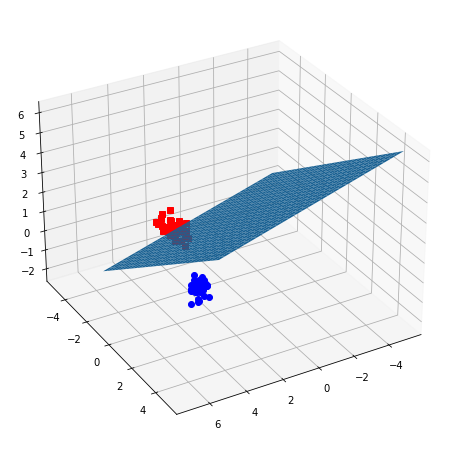

In [27]:
from mpl_toolkits.mplot3d import Axes3D

# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)
z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]

tmp = np.linspace(-5,5,30)
x,y = np.meshgrid(tmp,tmp)

fig = plt.figure(figsize=(12,8))
ax  = fig.add_subplot(111, projection='3d')
ax.plot3D(x_train_3d.loc[y_train_3d==0,'sepal length (cm)'], x_train_3d.loc[y_train_3d==0,'sepal width (cm)'], x_train_3d.loc[y_train_3d==0,'petal length (cm)'],'ob')
ax.plot3D(x_train_3d.loc[y_train_3d==1,'sepal length (cm)'], x_train_3d.loc[y_train_3d==1,'sepal width (cm)'], x_train_3d.loc[y_train_3d==1,'petal length (cm)'],'sr')
ax.plot_surface(x, y, z(x,y)) 
ax.view_init(30, 60)
plt.show()

### Get the accuracy and hinge loss of the testing set

In [28]:
y_hing = clf.decision_function(x_test_3d)
y_pred = model.predict(x_test_3d)
acc = accuracy_score(y_test_3d, y_pred)
hingeloss = hinge_loss(y_test_3d, y_hing)

print(f"Accuracy scor is: {acc}, and Hinge Loss is: {hingeloss}")

Accuracy scor is: 1.0, and Hinge Loss is: 0.0


## Train, predict and plot svm on 2d prepared data with the following configuration:

- kernel="linear", C=0.0001

In [34]:
model = SVC(kernel='linear', C=0.0001)
clf = model.fit(x_tr_scl, y_train_2d)

### Calculate the accuracy and hinge loss on the training set

In [35]:
y_hing = clf.decision_function(x_tr_scl)
y_pred = model.predict(x_tr_scl)
acc = accuracy_score(y_train_2d, y_pred)
hingeloss = hinge_loss(y_train_2d, y_hing)

print(f"Accuracy scor is: {acc}, and Hinge Loss is: {hingeloss}")

Accuracy scor is: 0.9583333333333334, and Hinge Loss is: 0.08336579786186492


### Calculate the accuracy and hinge loss on the testing set

In [37]:
y_hing = clf.decision_function(x_ts_scl)
y_pred = model.predict(x_ts_scl)
acc = accuracy_score(y_test_2d, y_pred)
hingeloss = hinge_loss(y_test_2d, y_hing)

print(f"Accuracy scor is: {acc}, and Hinge Loss is: {hingeloss}")

Accuracy scor is: 0.9666666666666667, and Hinge Loss is: 0.06669474331545876


### Plot the decision boundary with each point colored with its groundtruth class in 2D
- encircle your support vectors

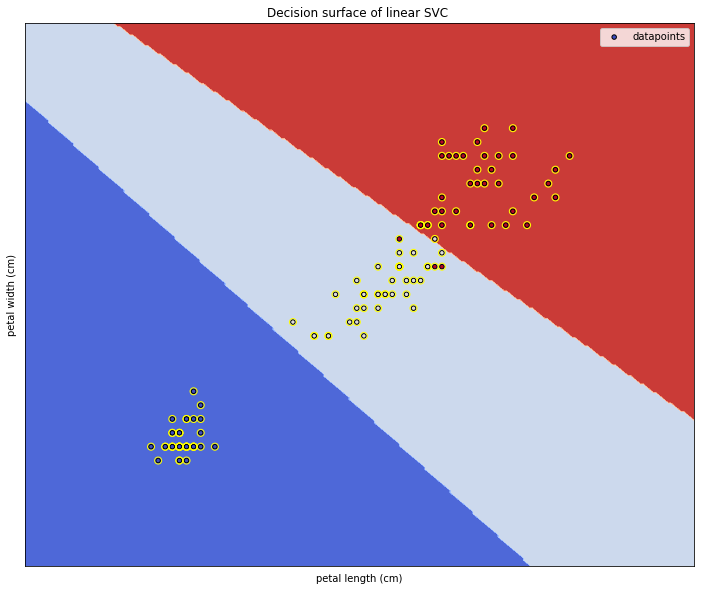

In [38]:
fig, ax = plt.subplots(figsize=(12,10))
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = x_tr_scl[:, 0], x_tr_scl[:, 1]
xx, yy = make_meshgrid(X0, X1)



plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=1)
ax.scatter(X0, X1, c=y_train_2d, cmap=plt.cm.coolwarm, s=20, edgecolors='k', label='datapoints')

# Encircle support vectors
plt.scatter(model.support_vectors_[:, 0],
            model.support_vectors_[:, 1], 
            s=50, 
            facecolors='none', 
            edgecolors='yellow', 
            alpha=1)
ax.set_ylabel(f'{df.iloc[:, 3].name}')
ax.set_xlabel(f'{df.iloc[:, 2].name}')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

## Train, predict and plot svm on 3d prepared data with the following configuration:

- kernel="linear", C=0.0001

In [39]:
model = SVC(kernel='linear', C=0.0001)
clf = model.fit(x_train_3d, y_train_3d)

### Plot 3D graph using binary training data with hyperplane separating the 2 points
    - Hint: You will hot have a plane perfectly seperating the data because it is underfit

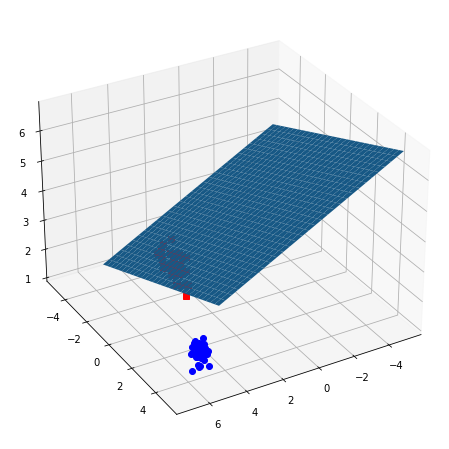

In [40]:
from mpl_toolkits.mplot3d import Axes3D

# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)
z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]

tmp = np.linspace(-5,5,30)
x,y = np.meshgrid(tmp,tmp)

fig = plt.figure(figsize=(12,8))
ax  = fig.add_subplot(111, projection='3d')
ax.plot3D(x_train_3d.loc[y_train_3d==0,'sepal length (cm)'], x_train_3d.loc[y_train_3d==0,'sepal width (cm)'], x_train_3d.loc[y_train_3d==0,'petal length (cm)'],'ob')
ax.plot3D(x_train_3d.loc[y_train_3d==1,'sepal length (cm)'], x_train_3d.loc[y_train_3d==1,'sepal width (cm)'], x_train_3d.loc[y_train_3d==1,'petal length (cm)'],'sr')
ax.plot_surface(x, y, z(x,y)) 
ax.view_init(30, 60)
plt.show()

### Get the accuracy and hinge loss of the testing set

In [41]:
y_hing = clf.decision_function(x_test_3d)
y_pred = model.predict(x_test_3d)
acc = accuracy_score(y_test_3d, y_pred)
hingeloss = hinge_loss(y_test_3d, y_hing)

print(f"Accuracy scor is: {acc}, and Hinge Loss is: {hingeloss}")

Accuracy scor is: 1.0, and Hinge Loss is: 0.9815122999999998


- <p style=color:red>Here we have a little loss because of underfitting model.</p>

## Train, predict and plot svm on 2d prepared data with the following configuration:

- kernel="poly", C=1.0, degree=2, coef0=0.0, gamma="scale"

In [42]:
model = SVC(kernel='poly', C=1.0, degree=2, coef0=0.0, gamma="scale")
clf = model.fit(x_tr_scl, y_train_2d)

### Calculate the accuracy and hinge loss on the training set

In [43]:
y_hing = clf.decision_function(x_tr_scl)
y_pred = model.predict(x_tr_scl)
acc = accuracy_score(y_train_2d, y_pred)
hingeloss = hinge_loss(y_train_2d, y_hing)

print(f"Accuracy scor is: {acc}, and Hinge Loss is: {hingeloss}")

Accuracy scor is: 0.8083333333333333, and Hinge Loss is: 0.38977265399448946


### Calculate the accuracy and hinge loss on the testing set

In [44]:
y_hing = clf.decision_function(x_ts_scl)
y_pred = model.predict(x_ts_scl)
acc = accuracy_score(y_test_2d, y_pred)
hingeloss = hinge_loss(y_test_2d, y_hing)

print(f"Accuracy scor is: {acc}, and Hinge Loss is: {hingeloss}")

Accuracy scor is: 0.8666666666666667, and Hinge Loss is: 0.27320719992026526


### Plot the decision boundary with each point colored with its groundtruth class in 2D
- encircle your support vectors

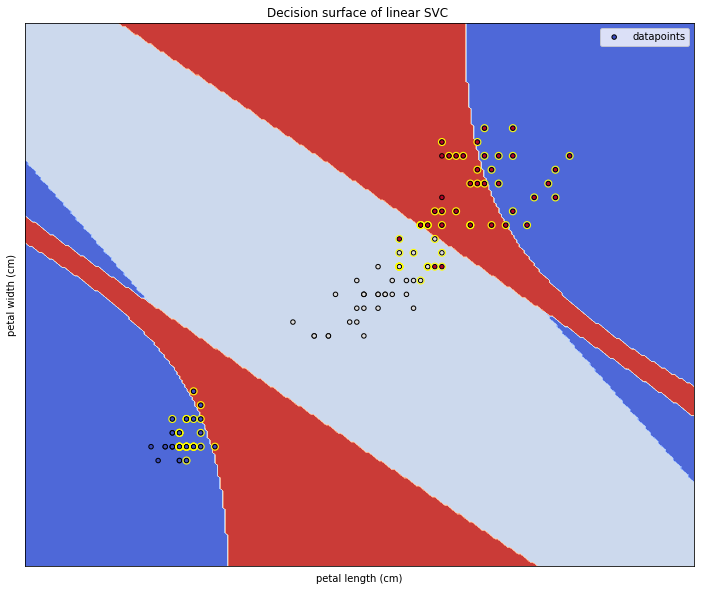

In [45]:
fig, ax = plt.subplots(figsize=(12,10))
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = x_tr_scl[:, 0], x_tr_scl[:, 1]
xx, yy = make_meshgrid(X0, X1)



plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=1)
ax.scatter(X0, X1, c=y_train_2d, cmap=plt.cm.coolwarm, s=20, edgecolors='k', label='datapoints')

# Encircle support vectors
plt.scatter(model.support_vectors_[:, 0],
            model.support_vectors_[:, 1], 
            s=50, 
            facecolors='none', 
            edgecolors='yellow', 
            alpha=1)
ax.set_ylabel(f'{df.iloc[:, 3].name}')
ax.set_xlabel(f'{df.iloc[:, 2].name}')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

## Train, predict and plot svm on 2d prepared data with the following configuration:

- kernel="poly", C=1.0, degree=3, coef0=0.0, gamma="scale"

In [47]:
model = SVC(kernel='poly', C=1.0, degree=3, coef0=0.0, gamma="scale")
clf = model.fit(x_tr_scl, y_train_2d)

### Calculate the accuracy and hinge loss on the training set

In [48]:
y_hing = clf.decision_function(x_tr_scl)
y_pred = model.predict(x_tr_scl)
acc = accuracy_score(y_train_2d, y_pred)
hingeloss = hinge_loss(y_train_2d, y_hing)

print(f"Accuracy scor is: {acc}, and Hinge Loss is: {hingeloss}")

Accuracy scor is: 0.9416666666666667, and Hinge Loss is: 0.12378640552578375


### Calculate the accuracy and hinge loss on the testing set

In [49]:
y_hing = clf.decision_function(x_ts_scl)
y_pred = model.predict(x_ts_scl)
acc = accuracy_score(y_test_2d, y_pred)
hingeloss = hinge_loss(y_test_2d, y_hing)

print(f"Accuracy scor is: {acc}, and Hinge Loss is: {hingeloss}")

Accuracy scor is: 0.9666666666666667, and Hinge Loss is: 0.0718834693060774


### Plot the decision boundary with each point colored with its groundtruth class in 2D
- encircle your support vectors

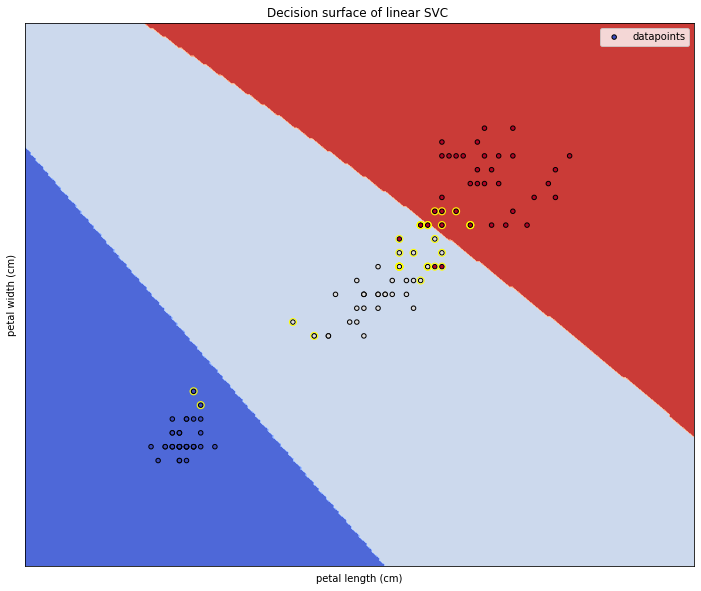

In [50]:
fig, ax = plt.subplots(figsize=(12,10))
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = x_tr_scl[:, 0], x_tr_scl[:, 1]
xx, yy = make_meshgrid(X0, X1)



plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=1)
ax.scatter(X0, X1, c=y_train_2d, cmap=plt.cm.coolwarm, s=20, edgecolors='k', label='datapoints')

# Encircle support vectors
plt.scatter(model.support_vectors_[:, 0],
            model.support_vectors_[:, 1], 
            s=50, 
            facecolors='none', 
            edgecolors='yellow', 
            alpha=1)
ax.set_ylabel(f'{df.iloc[:, 3].name}')
ax.set_xlabel(f'{df.iloc[:, 2].name}')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

## Train, predict and plot svm on 2d prepared data with the following configuration:

- kernel="rbf", C=1.0, gamma="scale"

In [51]:
model = SVC(kernel='rbf', C=1.0, gamma="scale")
clf = model.fit(x_tr_scl, y_train_2d)

### Calculate the accuracy and hinge loss on the training set

In [52]:
y_hing = clf.decision_function(x_tr_scl)
y_pred = model.predict(x_tr_scl)
acc = accuracy_score(y_train_2d, y_pred)
hingeloss = hinge_loss(y_train_2d, y_hing)

print(f"Accuracy scor is: {acc}, and Hinge Loss is: {hingeloss}")

Accuracy scor is: 0.9583333333333334, and Hinge Loss is: 0.08613307214105216


### Calculate the accuracy and hinge loss on the testing set

In [53]:
y_hing = clf.decision_function(x_ts_scl)
y_pred = model.predict(x_ts_scl)
acc = accuracy_score(y_test_2d, y_pred)
hingeloss = hinge_loss(y_test_2d, y_hing)

print(f"Accuracy scor is: {acc}, and Hinge Loss is: {hingeloss}")

Accuracy scor is: 0.9666666666666667, and Hinge Loss is: 0.06768885357905598


### Plot the decision boundary with each point colored with its groundtruth class in 2D
- encircle your support vectors

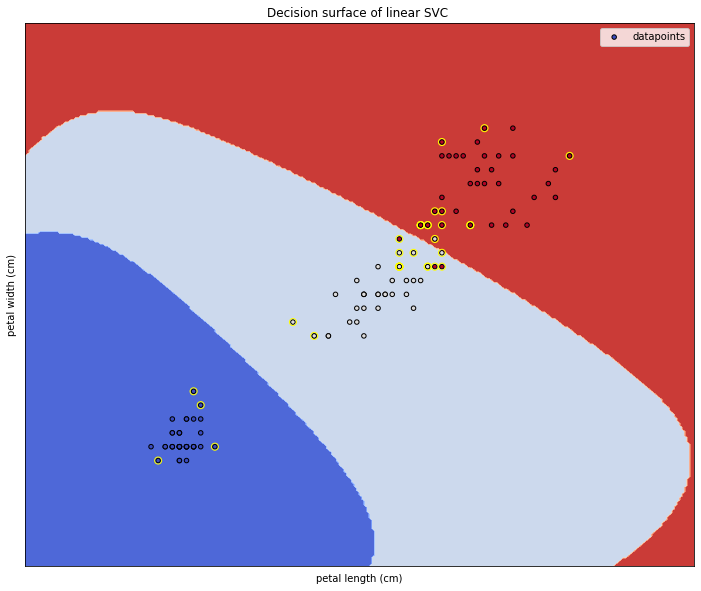

In [54]:
fig, ax = plt.subplots(figsize=(12,10))
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = x_tr_scl[:, 0], x_tr_scl[:, 1]
xx, yy = make_meshgrid(X0, X1)



plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=1)
ax.scatter(X0, X1, c=y_train_2d, cmap=plt.cm.coolwarm, s=20, edgecolors='k', label='datapoints')

# Encircle support vectors
plt.scatter(model.support_vectors_[:, 0],
            model.support_vectors_[:, 1], 
            s=50, 
            facecolors='none', 
            edgecolors='yellow', 
            alpha=1)
ax.set_ylabel(f'{df.iloc[:, 3].name}')
ax.set_xlabel(f'{df.iloc[:, 2].name}')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()